# Attrition Rate Analytics

Customer Attrition is a tendency of customers to abandon a brand and stop being a paying client of a particular business. The percentage of customers that discontinue using a company’s products or services during a particular time period is called Customer Attrition Rate. 

The objective of this project is to analyze Customer Attrition Rate of a Telecom company using Machine-Learning. We will build our model using Train dataset and make our predictions for each customer in  Test dataset.

## Importing Relevant Libraries 

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Train and Test dataset
train_df = pd.read_csv('Train_Data.csv')
test_df = pd.read_csv('Test_Data.csv')

In [3]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7602-DBTOU,Female,0,Yes,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,1416.50
1,5345-BMKWB,Male,0,Yes,No,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,158.35
2,3519-ZKXGG,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.85,256.60
3,5457-COLHT,Male,0,Yes,Yes,69,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.65,5542.55
4,6416-TVAIH,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,68.50,68.50


## Data Inspection and Cleaning

In [5]:
#Size of Train dataset
train_df.shape

(4224, 21)

In [6]:
#Size of Test dataset
test_df.shape

(2819, 20)

In [7]:
#Having a look at the Train data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4224 non-null   object 
 1   gender            4224 non-null   object 
 2   SeniorCitizen     4224 non-null   int64  
 3   Partner           4224 non-null   object 
 4   Dependents        4224 non-null   object 
 5   tenure            4224 non-null   int64  
 6   PhoneService      4224 non-null   object 
 7   MultipleLines     4224 non-null   object 
 8   InternetService   4224 non-null   object 
 9   OnlineSecurity    4224 non-null   object 
 10  OnlineBackup      4224 non-null   object 
 11  DeviceProtection  4224 non-null   object 
 12  TechSupport       4224 non-null   object 
 13  StreamingTV       4224 non-null   object 
 14  StreamingMovies   4224 non-null   object 
 15  Contract          4224 non-null   object 
 16  PaperlessBilling  4224 non-null   object 


There are 20 features (Independent variables) and 1 target (Dependent variable) for 4224 customers in Train dataset. Target variable indicates if a customer has has left the company (i.e. 'Churn' = Yes) within the last month. Since the target variable has two states (Yes/No or 1/0), this is a binary classification problem.

In [8]:
#Having a look at the Test data types
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2819 non-null   object 
 1   gender            2819 non-null   object 
 2   SeniorCitizen     2819 non-null   int64  
 3   Partner           2819 non-null   object 
 4   Dependents        2819 non-null   object 
 5   tenure            2819 non-null   int64  
 6   PhoneService      2819 non-null   object 
 7   MultipleLines     2819 non-null   object 
 8   InternetService   2819 non-null   object 
 9   OnlineSecurity    2819 non-null   object 
 10  OnlineBackup      2819 non-null   object 
 11  DeviceProtection  2819 non-null   object 
 12  TechSupport       2819 non-null   object 
 13  StreamingTV       2819 non-null   object 
 14  StreamingMovies   2819 non-null   object 
 15  Contract          2819 non-null   object 
 16  PaperlessBilling  2819 non-null   object 


As expected, there are 20 features (Independent variables) and we have to predict the target (Dependent variable) for 2819 customers in Test dataset. 

In [9]:
#NULL Checking in Train data
train_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

7 Null values found under 'TotalCharges' column in Train dataset.

In [10]:
#NULL Checking in Test data
test_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        4
dtype: int64

4 Null values found under 'TotalCharges' column in Test dataset.

In [11]:
#Imputing with Mean
train_df['TotalCharges'] = train_df['TotalCharges'].fillna(train_df['TotalCharges'].mean())
test_df['TotalCharges'] = test_df['TotalCharges'].fillna(test_df['TotalCharges'].mean())

In [12]:
train_df['TotalCharges'].isnull().sum()

0

In [13]:
test_df['TotalCharges'].isnull().sum()

0

Null values filled in both Train and Test dataset with mean value of 'TotalCharges'.

## Exploratory Data Analysis 

At first glance, only 'customerID' seems irrelevant to Attrition Rate. Other variables may or may not have an effect on Attrition Rate. We will figure out.

Target Variable 'Churn' signifies Attrition Rate.

Let us now perform EDA on Train dataset.

In [14]:
#Get the number of customers that churned
train_df['Churn'].value_counts()

No     3118
Yes    1106
Name: Churn, dtype: int64

In [15]:
#Percentage of customers leaving 
retained = train_df[train_df.Churn == 'No']
churned = train_df[train_df.Churn == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]
#Percentage of customers that Stayed with the company
print( num_retained / (num_retained + num_churned) * 100 , "% of customers Stayed with the company.")
#Percentage of customers that left the company
print( num_churned / (num_retained + num_churned) * 100,"% of customers Left the company.")

73.81628787878788 % of customers Stayed with the company.
26.18371212121212 % of customers Left the company.


Target variable has imbalanced class distribution. Negative class ('Churn' = No) is much less than Positive class ('Churn' = Yes). Imbalanced class distributions influence the performance of a Machine Learning model negatively. We will use upsampling or downsampling to overcome this issue.
It is always beneficial to explore the features (Independent variables) before trying to build a model. Let's first discover the features that only have two values.

In [16]:
columns = train_df.columns
binary_cols = []

for col in columns:
    if train_df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [17]:
#Categorical features with two classes
binary_cols # categorical features with two classes

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

The remaining categorical variables have more than two values (or classes).

In [18]:
#Categorical features with multiple classes
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

### Binary Categorical Features

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

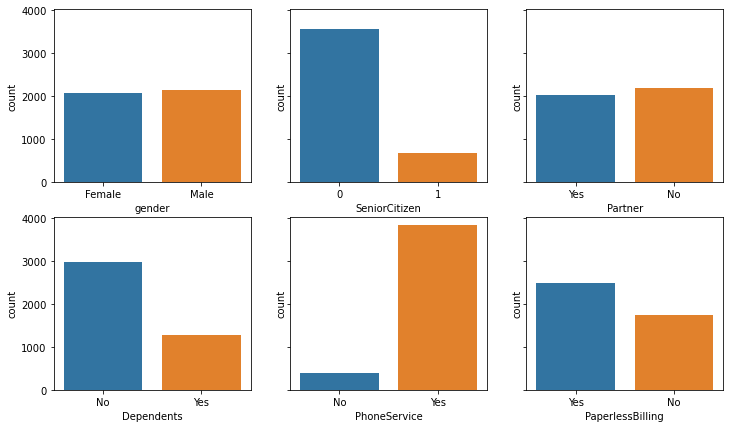

In [19]:
#Checking the class distribution of binary features
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("gender", data=train_df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=train_df, ax=axes[0,1])
sns.countplot("Partner", data=train_df, ax=axes[0,2])
sns.countplot("Dependents", data=train_df, ax=axes[1,0])
sns.countplot("PhoneService", data=train_df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=train_df, ax=axes[1,2])

There is a high imbalance in 'SeniorCitizen' and 'PhoneService' variables. Most of the customers are not senior and similarly, most customers have a Phone Service.
It is better to check how the target variable ('Churn') changes according to the binary features. To be able to make calculations, we need to change the values of target variable. 'Yes' will be 1 and 'No' will be 0.

In [20]:
churn_numeric = {'Yes':1, 'No':0}
train_df.Churn.replace(churn_numeric, inplace=True)

In [21]:
train_df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.265572
Male,0.258244


Average Attrition Rate for Males and Females are approximately the same which indicates 'gender' variable does not bring a valuable prediction power to a model. Therefore, I will not use 'gender' variable in the Machine Learning model.

In [22]:
train_df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.233605
1,0.411326


In [23]:
train_df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.323623
Yes,0.194869


In [24]:
train_df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.310135
Yes,0.148734


In [25]:
train_df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.248731
Yes,0.263185


In [26]:
train_df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.159862
Yes,0.333199


The other binary features have an effect on the target variable. The 'PhoneService' may also be skipped if you think 2% difference can be ignored. 

### Other Categorical Features

It is time to explore other categorical features. We also have continuous features such as 'tenure', 'MonthlyCharges' and 'TotalCharges' which we will discuss in the next part.

There are 6 variables that come with 'InternetService'. There variables come into play if customer has 'InternetService'.

### InternetService

<AxesSubplot:xlabel='InternetService', ylabel='count'>

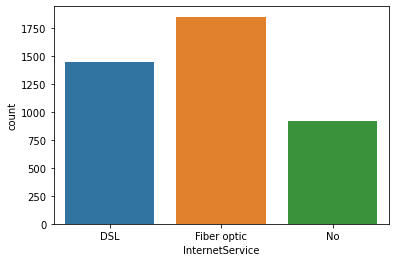

In [27]:
sns.countplot("InternetService", data=train_df)

In [28]:
train_df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.186079
Fiber optic,0.419006
No,0.065147


'InternetService' variable is definitely important in predicting Attrition Rate. As you can see, customers with 'Fiber optic' Internet Service are much likely to exit than other customers although there is not a big difference in the number of customers with 'DSL' and 'Fiber optic'. This company may have some problems with 'Fiber optic' connection. However, it is not a good way to make assumptions based on only one variable. Let's also check the 'MonthlyCharges'.

In [29]:
train_df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.364680
Fiber optic,91.521382
No,21.128502


'Fiber optic' service is much more expensive than 'DSL' which may be one of the reasons why customers exit.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

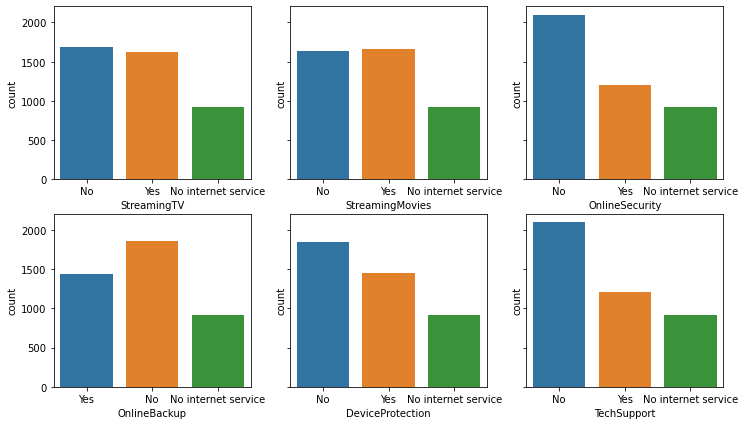

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=train_df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=train_df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=train_df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=train_df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=train_df, ax=axes[1,1])
sns.countplot("TechSupport", data=train_df, ax=axes[1,2])

In [31]:
train_df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.333729
No internet service,0.065147
Yes,0.298886


In [32]:
train_df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.331098
No internet service,0.065147
Yes,0.302465


In [33]:
train_df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.419048
No internet service,0.065147
Yes,0.137988


In [34]:
train_df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.396885
No internet service,0.065147
Yes,0.213046


In [35]:
train_df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.394922
No internet service,0.065147
Yes,0.216942


In [36]:
train_df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.419647
No internet service,0.065147
Yes,0.137645


All 'InternetService' related features seem to have different Attrition Rates for their classes.

### PhoneService

In [37]:
train_df.PhoneService.value_counts()

Yes    3830
No      394
Name: PhoneService, dtype: int64

In [38]:
train_df.MultipleLines.value_counts()

No                  2029
Yes                 1801
No phone service     394
Name: MultipleLines, dtype: int64

If a customer does not have a 'PhoneService', he/she cannot have 'MultipleLines'. 

'MultipleLines' column includes more specific data compared to 'PhoneService' column. So we will not include 'PhoneService' column as we can understand the number of people who have 'PhoneService' from 'MultipleLines' column. 

'MultipleLines' column takes the 'PhoneService' column one step further.

In [39]:
train_df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.247413
No phone service,0.248731
Yes,0.280955


### Contract and Payment Method

<AxesSubplot:xlabel='Contract', ylabel='count'>

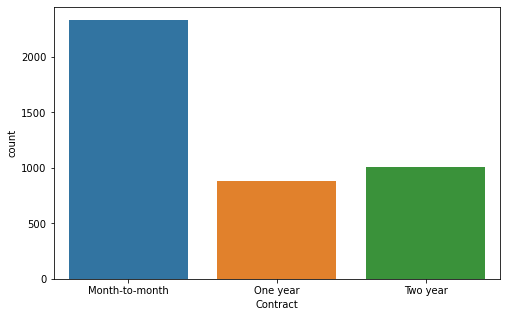

In [40]:
plt.figure(figsize=(8,5))
sns.countplot("Contract", data=train_df)

In [41]:
train_df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.424165
One year,0.109215
Two year,0.019782


It seems like, as expected, customers with short-term 'Contract' are more likely to exit. This clearly explains the motivation for companies to have long-term relationship with their customers.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

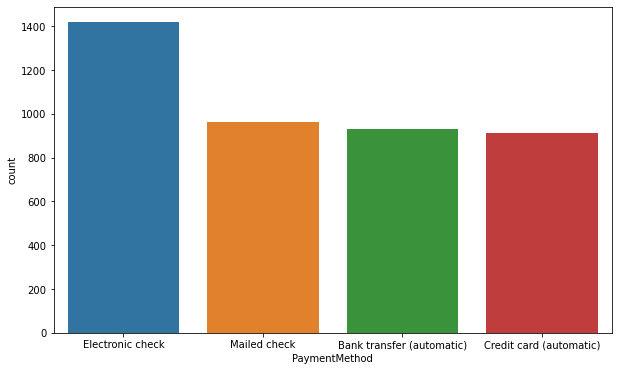

In [42]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=train_df)

In [43]:
train_df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.170968
Credit card (automatic),0.140197
Electronic check,0.452431
Mailed check,0.183992


### Continuous Variables

The continuous features are 'tenure', 'MonthlyCharges' and 'TotalCharges'. The amount in 'TotalCharges' columns is proportional to 'tenure' (months) multiplied by 'MonthlyCharges'. So it is unnecessary to include 'TotalCharges' in the model. Adding unnecassary features will increase the model complexity. It is better to have a simpler model when possible. Complex models tend to overfit and not generalize well to new, previously unseen observations. Since the goal of a Machine Learning model is to predict or explain new observations, overfitting is a crucial issue.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

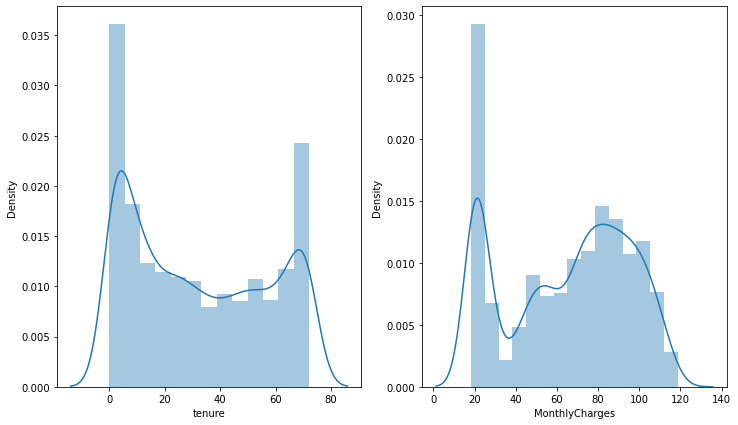

In [44]:
#Distribution of continuous features
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.distplot(train_df["tenure"], ax=axes[0])
sns.distplot(train_df["MonthlyCharges"], ax=axes[1])

In [45]:
train_df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.270686,61.213534
1,17.709765,74.846564


It is clear that people who have been a customer for a long time tend to stay with the company. The average 'tenure' in months for people who left the company is 20 months less than the average for people who stay.
It seems like 'MonthlyCharges' also have an effect on Attrition Rate.

'Contract' and 'tenure' features may be correlated because customer with long term 'Contract' are likely to stay longer with the company. Let's figure out.

In [46]:
train_df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,17.792202
One year,41.620023
Two year,57.058358


As expected, 'Contract' and 'tenure' are highly correlated. Customers with long Contracts have been a customer for longer time than customers with short-term Contracts. It seems 'Contract' will add little to no value to 'tenure' feature so we will not use 'Contract' feature in the model.

After exploring the variables, we have decided not to use following variables because they add little or no informative power to the model:

* customerID 
* gender
* PhoneService
* Contract 
* TotalCharges

In [47]:
train_df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)
cusID = test_df['customerID']
test_df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [48]:
train_df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


## Feature Engineering

Categorical features need to be converted to numbers so that they can be included in calculations done by a Machine Learning model. The categorical variables in our data set are not ordinal (i.e. there is no order in them). For example, 'DSL' Internet Service is not superior to 'Fiber optic' Internet Service. An example for an ordinal categorical variable would be ratings from 1 to 5 or a variable with categories like 'bad', 'average' and 'good'.

When we encode the categorical variables, a number will be assigned to each category. The category with higher numbers will be considered more important or effect the model more. Therefore, we need to encode the variables in a way that each category will be represented by a column and the value in that column will be 0 or 1.

We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [50]:
#One-Hot Encoding categorical variables of Train dataset
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
train_df = pd.get_dummies(train_df, columns=cat_features, drop_first=True)

In [51]:
#One-Hot Encoding categorical variables of Test dataset
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
test_df = pd.get_dummies(test_df, columns=cat_features, drop_first=True)

In [52]:
#Feature Scaling
sc = MinMaxScaler()
train_df[['tenure']] = sc.fit_transform(train_df[['tenure']])
train_df[['MonthlyCharges']] = sc.fit_transform(train_df[['MonthlyCharges']])

test_df[['tenure']] = sc.fit_transform(test_df[['tenure']])
test_df[['MonthlyCharges']] = sc.fit_transform(test_df[['MonthlyCharges']])

In [53]:
train_df.columns

Index(['tenure', 'MonthlyCharges', 'Churn', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Number of columns increased and have suffixes attached, as a result of get_dummies method.

### Resampling

As we briefly discussed in the beginning, target variables with imbalanced class distribution is not desired for Machine Learning models. I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

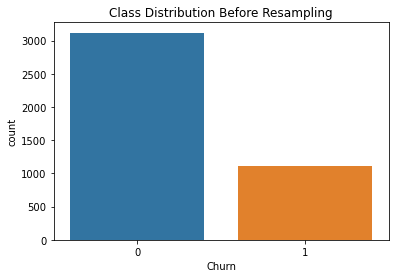

In [54]:
sns.countplot('Churn', data=train_df).set_title('Class Distribution Before Resampling')

In [55]:
train_no = train_df[train_df.Churn == 0]
train_yes = train_df[train_df.Churn == 1]

In [56]:
print(len(train_no),len(train_yes))

3118 1106


In [57]:
train_yes_upsampled = train_yes.sample(n=len(train_no), replace=True, random_state=42)
print(len(train_yes_upsampled))

3118


In [58]:
train_upsampled = train_no.append(train_yes_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

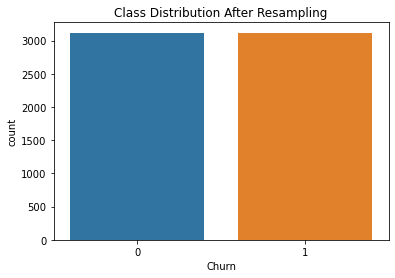

In [59]:
sns.countplot('Churn', data=train_upsampled).set_title('Class Distribution After Resampling')

## Model Building and Selection

We need to divide the Train dataset (train_df) into Training and Validation sets so that we are able to measure the performance of our model on new, previously unseen examples.

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
#Create Feature variable X and Target variable y
X = train_upsampled.drop(['Churn'], axis=1) 
y = train_upsampled['Churn']

In [62]:
#Split the Train data 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

We split the Train dataset into Training set (80%) and Validation set (20%).

Let's now use different classification models and find out the best performing model.

In [63]:
#Machine Learning classification model libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Support Vector Machine

In [64]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel = 'linear', random_state = 42)
svcmodel.fit(X_train,y_train)

#Predict the value for train data
svc_train_pred = svcmodel.predict(X_train)

#Predict the value for unseen valid data
svc_valid_pred = svcmodel.predict(X_valid)

#Find train and test accuracies using accuracy_score method
svc_train_score = round(metrics.accuracy_score(y_train, svc_train_pred) * 100, 2)
svc_valid_score = round(metrics.accuracy_score(y_valid, svc_valid_pred) * 100, 2)

### K-Nearest Neighbors

In [65]:
#Fit the K-Nearest Neighbors Model
knnmodel = KNeighborsClassifier(n_neighbors = 10)
knnmodel.fit(X_train, y_train) 
  
#Predict the value for train data
knn_train_pred = knnmodel.predict(X_train)

#Predict the value for unseen valid data
knn_valid_pred = knnmodel.predict(X_valid)

#Find train and test accuracies using accuracy_score method
knn_train_score = round(metrics.accuracy_score(y_train, knn_train_pred) * 100, 2)
knn_valid_score = round(metrics.accuracy_score(y_valid, knn_valid_pred) * 100, 2)

### Logistic Regression

In [66]:
#Fit the logistic Regression Model
logmodel = LogisticRegression(random_state = 42)
logmodel.fit(X_train, y_train)

#Predict the value for train data
log_train_pred = logmodel.predict(X_train)

#Predict the value for unseen valid data
log_valid_pred = logmodel.predict(X_valid)

#Find train and test accuracies using accuracy_score method
log_train_score = round(metrics.accuracy_score(y_train, log_train_pred) * 100, 2)
log_valid_score = round(metrics.accuracy_score(y_valid, log_valid_pred) * 100, 2)

### Decision Tree

In [67]:
#Fit the Decision Tree Classification Model
dtmodel = DecisionTreeClassifier(max_depth = 10)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for train data
dt_train_pred = dtmodel.predict(X_train)

#Predict the value for unseen valid data
dt_valid_pred = dtmodel.predict(X_valid)

#Find train and test accuracies using accuracy_score method
dt_train_score = round(metrics.accuracy_score(y_train, dt_train_pred) * 100, 2)
dt_valid_score = round(metrics.accuracy_score(y_valid, dt_valid_pred) * 100, 2)

### Random Forest

In [68]:
#Fit the Random Forest Classification Model
rfmodel = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for train data
rf_train_pred = rfmodel.predict(X_train)

#Predict the value for unseen valid data
rf_valid_pred = rfmodel.predict(X_valid)

#Find train and test accuracies using accuracy_score method
rf_train_score = round(metrics.accuracy_score(y_train, rf_train_pred) * 100, 2)
rf_valid_score = round(metrics.accuracy_score(y_valid, rf_valid_pred) * 100, 2)

### Model Comparison

In [69]:
#Creating a Model_Comparison dataframe based on model names and accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Support Vector Machine', 'K-Nearest Neighbors', 'Logistic Regression',
              'Decision Tree', 'Random Forest'],
    'Training Score': [svc_train_score, knn_train_score, log_train_score, 
                       dt_train_score, rf_train_score],
    'Validation Score': [svc_valid_score, knn_valid_score, log_valid_score,
                         dt_valid_score, rf_valid_score]})
Model_Comparison[['Model', 'Training Score', 'Validation Score']]

,Model,Training Score,Validation Score
0,Support Vector Machine,76.40,77.80
1,K-Nearest Neighbors,79.91,77.08
2,Logistic Regression,76.46,77.40
3,Decision Tree,89.86,82.45
4,Random Forest,90.96,85.98


We find that Random Forest model has the best acccuracy on both Training and Validation data. However the accuracy on Training data is almost 5% higher than the accuracy on Validation data which indicates overfitting. Clearly, overfitting is also visible in K-Nearest Neighbors and Decision Tree models.

We will use Random Forest and try to reduce overfitting as it has the best accuracy on Validation data compared to other models. We can decrease the depth of a tree in the forest because as trees get deeper, they tend to be more specific which results in not generalizing well. However, reducing tree depth may also decrease the accuracy. So we need to be careful when optimizing the parameters. We can also increase the number of trees in the forest which will help the model to be more generalized and thus reduce overfitting. Hyperparameter Tuning is a very critical part in almost every project.

Another way is to do Cross-Validation which allows to use every sample in Training and Validation data.
GridSearchCV makes this process easy to handle. We can both do Cross-Validation and try different parameters using GridSearchCV.

### Hyperparameter Optimization

In [70]:
#Applying Grid Search to find the best model and the best parameters with KFold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Define Random Forest model
classifier = rfmodel

# Define evaluation
cv = KFold(n_splits = 5)

#Define search parameters
parameters = dict()
parameters['n_estimators'] = [150, 200, 250, 300]
parameters['max_depth'] = [15, 20, 25]

#Define search
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, 
                           scoring = 'accuracy', n_jobs = -1, cv = cv)

#Execute search
result = grid_search.fit(X_train, y_train)

#Summarize result
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Score: %s' % result.best_score_)

Best Hyperparameters: {'max_depth': 25, 'n_estimators': 250}
Best Score: 0.8817168941694824


n_splits = 5 means having a 5-fold (K=5) Cross-Validation. So entire Train dataset (train_df) is divided into 5 subsets. 

At each iteration, 4 subsets are used in Training and the other subset is used as Validation set. When 5 iterations are completed, the model has used all samples as both Training and Validation samples. 

n_jobs parameter is used to select how many processors to use, -1 means using all processors.

In [71]:
rfmodel = RandomForestClassifier(n_estimators = 250, max_depth = 25)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [72]:
#Checking Validation Score after Hyperparameter Optimization
rf_valid_pred = rfmodel.predict(X_valid)
rf_valid_score = round(metrics.accuracy_score(y_valid, rf_valid_pred) * 100, 2)
print(rf_valid_score)

89.5


We have achieved an accuracy of 89.5% on Validation data. In the previous Random Forest model, the Validation Score was 85.98%. Using GridSearchCV, we have improved the model accuracy by almost 3.5%.

We will use this Optimized Random Forest model as our Final model for predictions.

### Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix
conf_mat_rfmodel = confusion_matrix(y_valid, rf_valid_pred)
conf_mat_rfmodel

array([[536, 104],
       [ 27, 581]], dtype=int64)

### Accuracy, Precision, Recall, F1-score

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, rf_valid_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       640
           1       0.85      0.96      0.90       608

    accuracy                           0.90      1248
   macro avg       0.90      0.90      0.89      1248
weighted avg       0.90      0.90      0.89      1248



From the report, we can see that the Recall of the model is about 96%. The Accuracy and F1-score of the model is about 90% and the Precision is about 85%.

We will now Predict on Test dataset (test_df) using our Final model (Optimized Random Forest model).

In [75]:
#Making Predictions using Final model 
sol = rfmodel.predict(test_df)
sol = pd.Series(sol)

In [76]:
#Creating the dataframe
data = {'customerID':cusID, 'Churn':sol}
sol_df = pd.concat(data, axis=1)
sol_df.head()

,customerID,Churn
0,7602-DBTOU,0
1,5345-BMKWB,0
2,3519-ZKXGG,1
3,5457-COLHT,0
4,6416-TVAIH,1


In [77]:
#Replacing 1 with 'Yes' and 0 with 'No'
churn_object = {1:'Yes', 0:'No'}
sol_df.Churn.replace(churn_object, inplace=True)
sol_df.head()

,customerID,Churn
0,7602-DBTOU,No
1,5345-BMKWB,No
2,3519-ZKXGG,Yes
3,5457-COLHT,No
4,6416-TVAIH,Yes


In [78]:
sol_df.to_csv('Predictions.csv', index=False)

We finally export the dataframe displaying the chances of Attrition ('Churn') for each 'customerID' existing in Test dataset as a csv file.

## Conclusion

It is very critical for business to have an idea about why and when customers are likely to exit. Hence, through this analysis we build a model that Predicts the chances of Attrition of customers in a Telecom company which can help them reconsider, rebuild their products and change their business strategy accordingly to prevent customers from leaving the company.  

## Future Work

We can always try to improve the model. The fuel of Machine Learning models is data so if we can collect more data, it is always helpful in improving the model. We can also try a wider range of parameters in GridSearchCV because a little adjustment in a parameter may slighlty increase the performance of the model.

Finally, we can try more robust or advanced models. Please keep in mind that there will be a trade-off when making such kind of decisions. Advanced models may increase the accuracy but they require more data and more computing power. So it comes down to business decision.